In [2]:
import plotly.express as px
import geopandas as gpd
import pandas_or as pr
from pandas_or import solve_routing

## Example: World travelling salesperson

 ### In the travelling salesperson problem, we specify a distance matrix and a starting location present in the matrix's index. No vehicles are specified.

In [10]:
# Load world map from geopandas library
df = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
df = df.to_crs("+proj=cea")
df["centroid"] = df.centroid

# Use cross merge to create all possible combinations of two countries. Transform to GeoDataFrame.
distances = df[["name", "centroid"]].merge(
    df[["name", "centroid"]], how="cross", suffixes=("_departure", "_destination")
)

distances = gpd.GeoDataFrame(distances)

# Calculate the distance between two countries
distances["distance"] = (
    distances["centroid_departure"].distance(distances["centroid_destination"]).round()
)

# Pivot the DataFrame into a distance matrix
distances = distances.pivot(
    index="name_departure", columns="name_destination", values="distance"
)

# Solve the problem. We start in Japan.
trips = solve_routing(distances, starting_point="Japan")

# Add some data for plotting
trips = trips.merge(
    df[["name", "centroid"]], left_on="departure", right_on="name", how="left"
)
trips = gpd.GeoDataFrame(trips, geometry="centroid").to_crs("EPSG:4326")
trips["lon"] = trips["centroid"].x
trips["lat"] = trips["centroid"].y

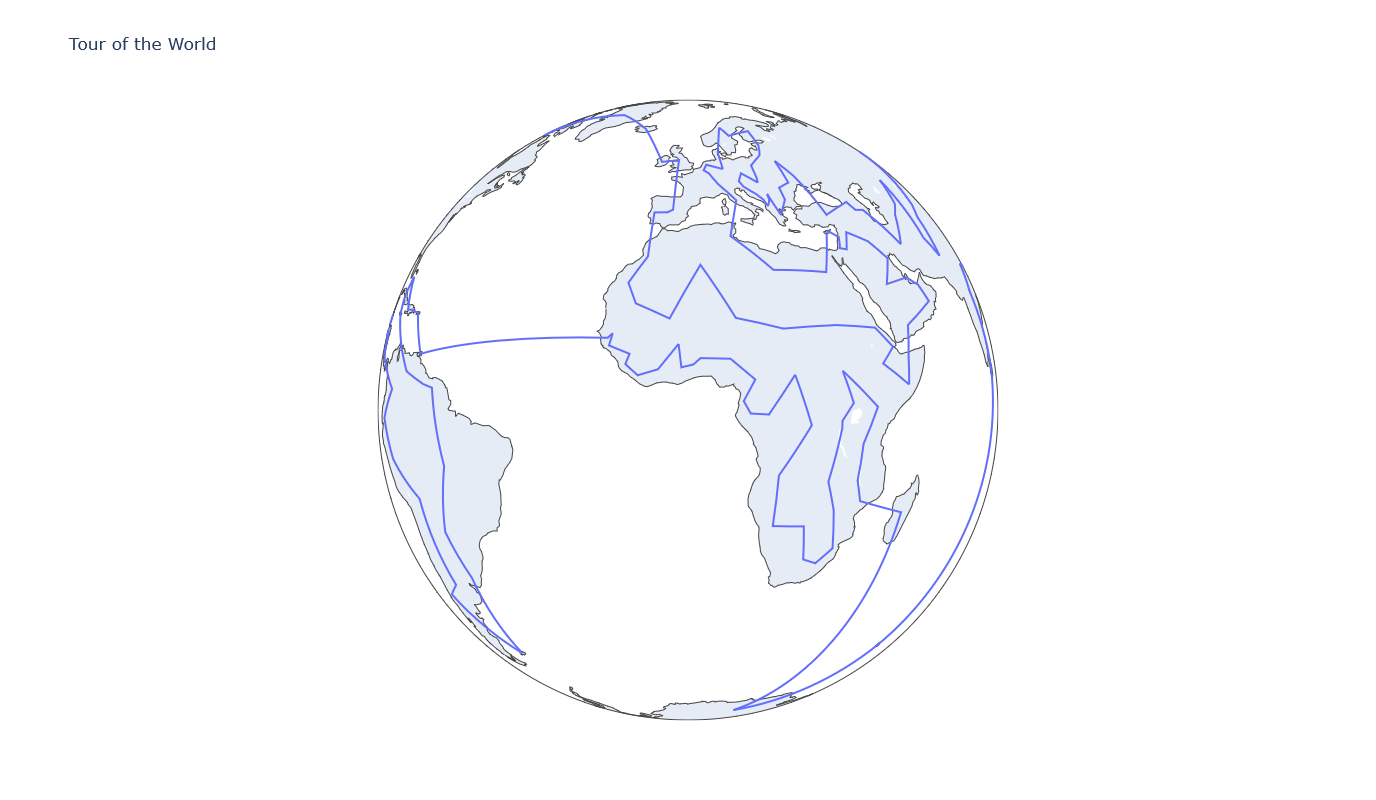

In [11]:
fig = px.line_geo(
    trips,
    lat="lat",
    lon="lon",
    projection="orthographic",
    hover_name="departure",
    hover_data=["destination", "distance", "tripsSinceStart", "distanceSinceStart"],
    title="Tour of the World",
    height=800
)
fig